### Classification Urban Area using NAIP 

In [81]:
from datetime import date
today = date.today()
d2 = today.strftime("%B %d, %Y")
print("Updated by Masoumeh Hashemi, ", d2) 

Updated by Masoumeh Hashemi,  April 29, 2023


 Python Scrprit has been developed in HydroShare  


***ATENTION:*** before running this lab, upgrade geemap, please go to File, New, Terminal, and pass the following command:

### The goal of this study is to classify Urban area into three classes including: Street , Building, Landascape area 

### 1. Introduction to classification and regression
For present purposes, define prediction as guessing the value of some geographic variable of interest *g*, using a function *G* that takes as input a pixel vector **p**:

\begin{equation}
G_{T}(p_i) = g_i 
\end{equation}

The *i* in this equation refers to a particular instance from a set of pixels.  Think of *G* as a guessing function and *gi* as the guess for pixel *i*.   The **T** in the subscript of *G* refers to a *training set* (a set of known values for p and the correct g), used to infer the structure of G.  You have to choose a suitable *G* to train with **T**.  When *g* is nominal (e.g. {'water', 'vegetation', 'bare'}), call this setup classification.  When g is numeric, call this setup regression.  This is an incredibly simplistic description of a problem addressed in a broad range of fields including mathematics, statistics, data mining, machine learning, etc.  Interested readers may see [Witten et al. (2011)](http://www.cs.waikato.ac.nz/ml/weka/book.html), [Hastie et al. (2009)](http://statweb.stanford.edu/~tibs/ElemStatLearn/) or [Goodfellow et al (2016)](http://www.deeplearningbook.org/).

### Classification
Classification in Earth Engine has a similar workflow to regression: build the training, train the classifier, classify an image.


In classification, g is nominal.  The first step is to create training data manually.  (Alternatively, upload a shapefile  training data (of points or polygons), for example data collected on the ground with a GPS).  Using Google Earth we can also digitize training polygons.

#### Creat Base map 

In [82]:
import ee
ee.Initialize()

import geemap
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

### import a NAIP image for Logan,Utah,USA


 ##### use the web page  to find your study area https://www.latlong.net/ website

Define the rectangular 

In [83]:
latitude = 41.987771
longitude= -112.033829

aoi = ee.Geometry.Rectangle([-114.052791,41.987771, -112.025840,40.987252 ]);

## -NAIP.¶
The National Agriculture Imagery Program (NAIP) is an effort to acquire imagery over the continental US on a 3-year rotation using airborne sensors. The imagery have a spatial resolution of 1-2 meters.

Search for 'naip' and import the first result (which should be 'NAIP: National Agriculture Imagery Program'. Name the import naip.

Since NAIP imagery is distributed as quarters of Digital Ortho Quads (DOQs) at irregular cadence, load everything from the most recent year in the acquisition cycle (2012) over the study area and mosaic() it:

https://www.google.com/search?q=clip+images+in+geemap&rlz=1C1CHBF_enUS1040US1041&oq=clip+images+in+geemap&aqs=chrome..69i57j33i160l2.7788j0j15&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:a0d01531,vid:43A1g-8xHgY

https://developers.google.com/earth-engine/apidocs/ee-image-clip
https://developers.google.com/earth-engine/apidocs/ee-image-clip
https://developers.google.com/earth-engine/apidocs/ee-image-clip

### Importing Area of Interest 

In [84]:
logan_shp ="logan.shp"
logan_shp
logan_shp = geemap.shp_to_ee(logan_shp)
Map.addLayer(logan_shp)


### Importing NAIP Images 

In [85]:


UT =ee.ImageCollection("USDA/NAIP/DOQQ").filterDate('2017-01-01', '2018-12-31').filterBounds(logan_shp)

UT = UT.mosaic();
# Clip the image based on AOI
UT_logan=UT.clip(logan_shp)
# Print the image band names to the console.
band_names = UT_logan.bandNames()
print(band_names.getInfo())
UT_logan

['R', 'G', 'B', 'N']


#### Adding the image to the Map 

In [86]:
Map.addLayer(UT_logan, {'bands': ['R', 'G', 'B'], 'max': 255}, name='NAIP')
Map.centerObject(aoi)
Map

Map(bottom=754.0, center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(…

Define areas that have unique characteristics: Street ( Parking Lot), water, vegetation

We can use NDVI for help in diferentiating these areas:

### Make training dataset

There are several ways you can create a region for generating the training dataset.

- Draw a shape (e.g., rectangle) on the map and the use `region = Map.user_roi`
- Define a geometry, such as `region = ee.Geometry.Rectangle([-122.6003, 37.4831, -121.8036, 37.8288])`
- Create a buffer zone around a point, such as `region = ee.Geometry.Point([-122.4439, 37.7538]).buffer(10000)`
- If you don't define a region, it will use the image footprint by default

In [87]:
#REC1
poly = ee.Geometry.Rectangle([-111.832846, 41.760899, -111.831617, 41.760070])

# // Create a Feature from the Geometry.
streetl= ee.Feature(poly, {'class': 2, 'name': 'street'});
#Map.addLayer(streetl, {'fill_color':'yellow', 'outline': 1}, name='streetl')

#REC2
poly = ee.Geometry.Rectangle([-111.831689,41.7402207, -111.830956, 41.739764])

# // Create a Feature from the Geometry.
street2 = ee.Feature(poly , {'class': 2, 'name': 'street'});
#Map.addLayer(street2, {'fill_color':'yellow', 'outline': 1}, name='street2')
#REC3
poly = ee.Geometry.Rectangle([-111.837205,41.734306, -111.836638,41.7338021])

# // Create a Feature from the Geometry.
street3 = ee.Feature(poly, {'class': 2, 'name': 'street'});
#Map.addLayer(street3, {'fill_color':'yellow', 'outline': 1}, name='street3')
#Map

In [88]:
# FOR VEGETATION

#Rec1
poly= ee.Geometry.Rectangle([-111.830666,41.749691,-111.829679, 41.749211])
vegetationl = ee.Feature(poly, {'class': 1, 'name': 'vegetation'});
#Map.addLayer(vegetationl , {'fill_color':'green', 'outline': 1}, name='vegetationl')

#Rec2
poly= ee.Geometry.Rectangle([-111.836743,41.747952,-111.836078, 41.746976])

# // Create a Feature from the Geometry.
vegetation2 = ee.Feature(poly, {'class': 1, 'name': 'vegetation'});
#Map.addLayer(vegetation2, {'fill_color':'green', 'outline': 1}, name='vegetation2')
#Rec3
poly = ee.Geometry.Rectangle([-111.848104,41.755461,-111.846472,41.754757])
# // Create a Feature from the Geometry.
vegetation3 = ee.Feature(poly, {'class': 1, 'name': 'vegetation'});
Map.addLayer(vegetation3, {'fill_color':'green', 'outline': 1}, name='vegetation3')

#Map

In [89]:
# FOR Building 

#Rec1
poly = ee.Geometry.Rectangle([-111.812329,41.747856, -111.811556, 41.747296])
Buildingl = ee.Feature(poly, {'class':0, 'name': 'Building'});
#Map.addLayer(Buildingl, {'fill_color':'gray', 'outline': 1}, name='Buildingl')

#Rec2
poly= ee.Geometry.Rectangle([-111.816211,41.754724, -111.815780, 41.754031])

# // Create a Feature from the Geometry.
Building2 = ee.Feature(poly, {'class': 0, 'name': 'Building'});
#Map.addLayer(Building2, {'fill_color':'gray', 'outline': 1}, name='Building2')
#Rec3
poly= ee.Geometry.Rectangle([-111.821893,41.756152,-111.821936, 41.755607])

#// Create a Feature from the Geometry.
Building3 = ee.Feature(poly, {'class': 0, 'name': 'Building'});
#Map.addLayer(Building3, {'fill_color':'gray', 'outline': 1}, name='Building3')

Map

Map(bottom=754.0, center=[41.48974011436519, -113.0393155], controls=(WidgetControl(options=['position', 'tran…

### Calculate vegetation indicators

#### NDVI(Normalized Difference Vegetation Index )


In [90]:
img_name="ndvi"
ndvi=UT_logan.normalizedDifference(['N', 'R'])
UT_logan2 = UT_logan.addBands(ndvi)

In [91]:
UT_logan2.bandNames().getInfo()

['R', 'G', 'B', 'N', 'nd']

#### EXG (Excess Green Index )


In [92]:
exg = UT_logan2.select('G', 'R', 'B').expression(
  '(2 * b2) - b1 - b3', {
    'b1': UT_logan2.select('R'),  # Red
    'b2': UT_logan2.select('G'),  # Green
    'b3': UT_logan2.select('B')   # Blue
})

In [93]:
UT_logan3 = UT_logan2.addBands(exg)

#### EVI(Enhanced Vegetation Index)


In [94]:

evi = UT_logan3.select('R', 'B','N').expression(
    '2.5 * ((nir - red) / (nir + 6 * red - 7.5 * blue + 1))',  {
    'nir': UT_logan3.select('N'),  # Near-infrared (NIR)
    'red': UT_logan3.select('R'),  # Red
    'blue':UT_logan3.select('B')  # Blue
})
 

In [95]:
UT_logan4= UT_logan3.addBands(evi)

#### GCI (Green Chlorophyll Index)


In [96]:

GCI = UT_logan4.select('G', 'B').expression(
    '(green/ blue)-1',  {
    
    'green': UT_logan4.select('G'),  # green
    'blue':UT_logan4.select('B')  # Blue
})

In [97]:
UT_logan5= UT_logan4.addBands(GCI)


##### Set New Name for new Bands

In [98]:
UT_logan5.bandNames().getInfo()

['R', 'G', 'B', 'N', 'nd', 'constant', 'constant_1', 'G_1']

In [99]:
band_names =UT_logan5.bandNames().getInfo()

In [100]:
band_names

['R', 'G', 'B', 'N', 'nd', 'constant', 'constant_1', 'G_1']

In [101]:
new_band_names = ['R', 'G', 'B', 'N', 'ndvi', 'exg', 'EVI','GCI']

In [102]:
renamed_image = UT_logan5.select(band_names).rename(new_band_names)

In [103]:
print('New band names:', renamed_image.bandNames().getInfo())

New band names: ['R', 'G', 'B', 'N', 'ndvi', 'exg', 'EVI', 'GCI']


##### Dipaly Bands and Vegetation Indicators 

In [104]:
Map.addLayer(renamed_image, {'bands': ['R', 'G', 'B'], 'max': 255}, name='NAIP')
# vis_params = {
#   'min': 0,
#   'max': 1.0,
#   'palette': ['blue','white','brown','yellow', 'lime', 'green','navy']}

vegPalette = ['white','red','yellow', 'green','blue']
Map.addLayer(renamed_image, {'bands': ['ndvi'], 'min': 0, 'max': 1.0, 'palette': vegPalette},name = 'NDVI')

Map.addLayer(renamed_image, {'bands': ['exg'], 'min': 0, 'max': 2, 'palette': vegPalette}, name='exg')
Map.addLayer(renamed_image, {'bands': ['EVI'], 'min': 0, 'max': 2, 'palette': vegPalette}, name='EVI')
Map.addLayer(renamed_image, {'bands': ['GCI'], 'min': -1, 'max': 1, 'palette': vegPalette}, name='GCI')
Map.centerObject(aoi)
Map

Map(bottom=49196.0, center=[41.50857729743935, -113.20312500000001], controls=(WidgetControl(options=['positio…

In [105]:
trainingFeatures = ee.FeatureCollection([Buildingl,Building2,Building3,vegetationl, vegetation2, vegetation3, streetl, street2, street3 ])

Specify the bands of the Landsat composite to be used as predictors (i.e. the elements of p):


In [106]:
predictionBands = ['N', 'R', 'G', 'B']

In the merged FeatureCollection, each Feature should have a property called 'class' where the classes are consecutive integers, one for each class, starting at 0. Verify that this is true.

In [107]:
band_names = renamed_image.getInfo()['bands']
for band in band_names:
    print(band['id'])

R
G
B
N
ndvi
exg
EVI
GCI


In [108]:
print(trainingFeatures.first().getInfo())

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-111.812329, 41.747296], [-111.811556, 41.747296], [-111.811556, 41.747856], [-111.812329, 41.747856], [-111.812329, 41.747296]]]}, 'id': '0', 'properties': {'class': 0, 'name': 'Building'}}


  Create a training set T for the classifier by sampling the Landsat composite with the merged features:

In [109]:
classifierTraining = renamed_image.select(predictionBands).sampleRegions(
      collection= trainingFeatures, 
      properties= ['class'], 
      scale= 30
    );

In [110]:
# // Randomly split the data into 60% for training, and 40% for testing
trainingTesting = classifierTraining.randomColumn('random',111009);

training = trainingTesting.filter(ee.Filter.lt('random', 0.66));

testing = trainingTesting.filter(ee.Filter.gte('random', 0.66));

### - Non-linear regression functions

There is a pletora of options for classification in Google Earth Engine. Here is an screenshot of these options:

In [111]:
# ![](https://i.imgur.com/vROsEiq.png)
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/vROsEiq.png")#, width=100, height=100)

#### Classification and Regression Tree (CART)

In [112]:
#hyperparameter to tune
leaf_val=7

cartclassifier = ee.Classifier.smileCart(minLeafPopulation=leaf_val).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    );

- Make predictions over the input imagery (classify in this context is a misnomer):


In [113]:
cartClasifficationImage = renamed_image.select(predictionBands).classify(cartclassifier);

Map.addLayer(cartClasifficationImage, {'min': 0, 'max': 2,
                                   'palette':['blue', 'green','yellow']},'CART classification');
Map

Map(bottom=98110.0, center=[41.49006348843996, -113.03833007812501], controls=(WidgetControl(options=['positio…

### Random Forest classifier (RF)

In [114]:
# hyperparameter to tune
trees_val=5

rfClassification = ee.Classifier.smileRandomForest(numberOfTrees=trees_val, seed=111009).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )

In [115]:
# // Perform the RF regression on the landsat image
rfClassificationImage = renamed_image.select(predictionBands).classify(rfClassification);
    
# // Visualize the RF regression
Map.addLayer(rfClassificationImage,  {'min': 0, 'max': 2,
                                   'palette':['blue','green', 'yellow']}, 'RF classification');

Map

Map(bottom=49205.0, center=[41.49006348843996, -113.03833007812501], controls=(WidgetControl(options=['positio…

#### Support Vector Machines (SVM)

In [116]:
# hyperparameter to tune
gamma_val =0.06

# // Create an SVM classifier with custom parameters.
svClassification = ee.Classifier.libsvm(svmType='C_SVC',kernelType='RBF',gamma=gamma_val).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )

In [117]:
# // Perform the RF regression on the landsat image
svClassificationImage = renamed_image.select(predictionBands).classify(svClassification);
    
# // Visualize the RF regression
Map.addLayer(svClassificationImage,{'min': 0, 'max': 2,
                                   'palette':['blue', 'green','yellow']}, 'SV CLassification');
Map

Map(bottom=49205.0, center=[41.49006348843996, -113.03833007812501], controls=(WidgetControl(options=['positio…

In [118]:
# // Perform the RF classification on the test set
import  numpy as np 
test=testing.classify(rfClassification)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());


ConfusionMatrix
[[ 2  2  0]
 [ 0 12  0]
 [ 0  1  0]]
Overall Accuracy: 0.8235294117647058
Producers Accuracy: [[0.5], [1], [0]]
Consumers Accuracy: [[1, 0.8, 0]]
Kappa: 0.495049504950495


In the classification context, accuracy measurements are often derived from a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

### Accuracy Assessment

Print the confusion matrix and expand the object to inspect the matrix.  The entries represent number of pixels.  Items on the diagonal represent correct classification.  Items off the diagonal are misclassifications, where the class in row i is classified as column j.  It's also possible to get basic descriptive statistics from the confusion matrix.  For example:

### What is a confusion matrix?

A confusion matrix is used here to compare two different data, one the true value and the other the predicted values. We will be using it primarily to compute overall accuracy between the model and the different machine learning results, but confusion matrices also provide explicit information about which  classes were classified incorrectly; not just if pixels were classified incorrectly, but what class they were incorrectly classified as. For an example of how to use and interpret a confusion matrix for LULC remote sensing visit https://www.harrisgeospatial.com/docs/CalculatingConfusionMatrices.html and 
http://gsp.humboldt.edu/olm_2019/courses/GSP_216_Online/lesson6-2/metrics.html

In [119]:
# // Perform the CART classification on the test set

test=testing.classify(cartclassifier)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

In [120]:
import numpy as np
errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());



ConfusionMatrix
[[ 2  2  0]
 [ 2 10  0]
 [ 0  1  0]]
Overall Accuracy: 0.7058823529411765
Producers Accuracy: [[0.5], [0.8333333333333334], [0]]
Consumers Accuracy: [[0.5, 0.7692307692307693, 0]]
Kappa: 0.2735042735042736


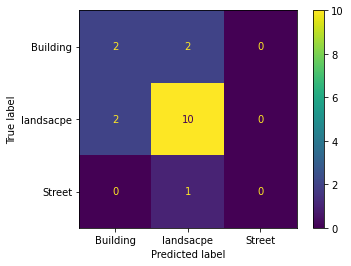

In [121]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
errormaxtrix=np.array(testAccuracy.array().getInfo())
cm_display = ConfusionMatrixDisplay(confusion_matrix = errormaxtrix, display_labels = ["Building", "landsacpe","Street"])

cm_display.plot()
plt.show()


In [122]:
# // Perform the RF classification on the test set

test=testing.classify(rfClassification)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());


ConfusionMatrix
[[ 2  2  0]
 [ 0 12  0]
 [ 0  1  0]]
Overall Accuracy: 0.8235294117647058
Producers Accuracy: [[0.5], [1], [0]]
Consumers Accuracy: [[1, 0.8, 0]]
Kappa: 0.495049504950495


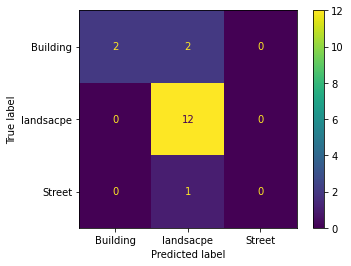

In [123]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
errormaxtrix=np.array(testAccuracy.array().getInfo())
cm_display = ConfusionMatrixDisplay(confusion_matrix = errormaxtrix, display_labels = ["Building", "landsacpe","Street"])

cm_display.plot()
plt.show()

In [124]:
# // Perform the SVR classification on the test set

test=testing.classify(svClassification)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());


ConfusionMatrix
[[ 2  2  0]
 [ 0 12  0]
 [ 0  1  0]]
Overall Accuracy: 0.8235294117647058
Producers Accuracy: [[0.5], [1], [0]]
Consumers Accuracy: [[1, 0.8, 0]]
Kappa: 0.495049504950495


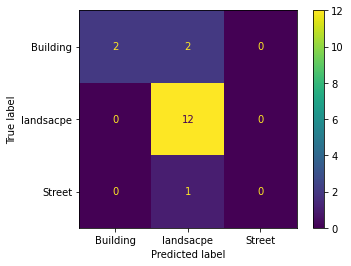

In [125]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
errormaxtrix=np.array(testAccuracy.array().getInfo())
cm_display = ConfusionMatrixDisplay(confusion_matrix = errormaxtrix, display_labels = ["Building", "landsacpe","Street"])

cm_display.plot()
plt.show()

### BONUS: Hyperparameters tuning




### RF

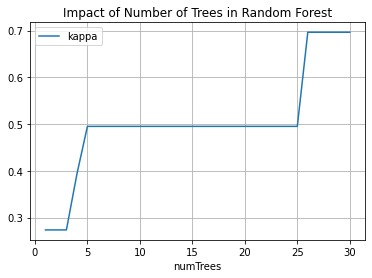

In [126]:
numTrees = ee.List.sequence(1, 30, 1)


def trees(t):
    rfclass = ee.Classifier.smileRandomForest(numberOfTrees=t, seed=111009).train(
    features= training, 
    classProperty= 'class', 
    inputProperties= predictionBands)
    
    rfTesting = testing.classify(rfclass)
    testAccuracy = rfTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_trees=numTrees.map(trees)
value_info = kappa_trees.getInfo()

# print(rmse_trees.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['numTrees'] = numTrees.getInfo() 

ax =df.plot.line(x='numTrees', 
             y='kappa',
             title= 'Impact of Number of Trees in Random Forest'
             )
ax.grid()

### SVM 

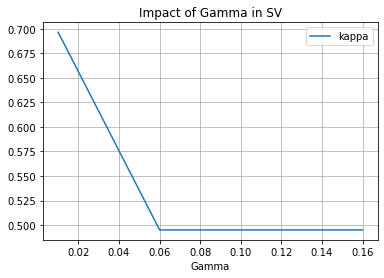

In [127]:
gamma_vals = ee.List.sequence(0.01, 0.2, 0.05)


def gammas(t):
    svclass = ee.Classifier.libsvm(svmType='C_SVC',kernelType='RBF',gamma=t).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )
    
    svTesting = testing.classify(svclass)
    testAccuracy = svTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_gama=gamma_vals.map(gammas)
value_info = kappa_gama.getInfo()

# print(rmse_gama.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['Gamma'] = gamma_vals.getInfo() 

ax =df.plot.line(x='Gamma', 
             y='kappa',
             title= 'Impact of Gamma in SV'
             )
ax.grid()

### CART

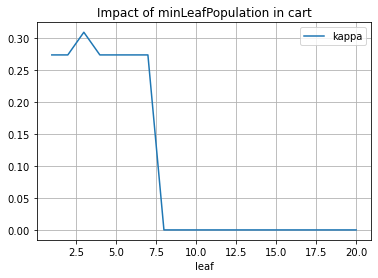

In [128]:
leaf_vals = ee.List.sequence(1, 20, 1)


def leaves(t):
    cartclass= ee.Classifier.smileCart(minLeafPopulation=t).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )
    
    cartTesting = testing.classify(cartclass)
    testAccuracy = cartTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_leaf=leaf_vals.map(leaves)
value_info = kappa_leaf.getInfo()

# print(rmse_gama.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['leaf'] = leaf_vals.getInfo() 

ax =df.plot.line(x='leaf', 
             y='kappa',
             title= 'Impact of minLeafPopulation in cart'
             )
ax.grid()